# Frame the problem: Given the features of a flower, can we predict the species of the flower?

## Install and Load the libraries

In [ ]:
"""
!pip install pydotplus
!pip install numpy
!pip install ipython
!pip install sklearn
!pip install matplotlib
"""

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from IPython.display import Image  
import pydotplus
import pandas as pd

## Collect/load the data

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

## Conduct Exploratory Data Analysis

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


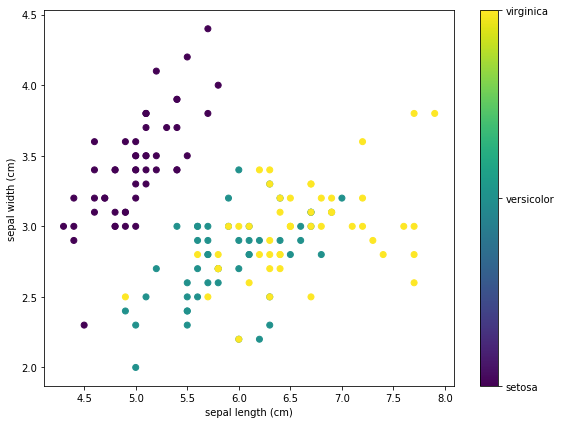

In [7]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])

plt.tight_layout()
plt.show()

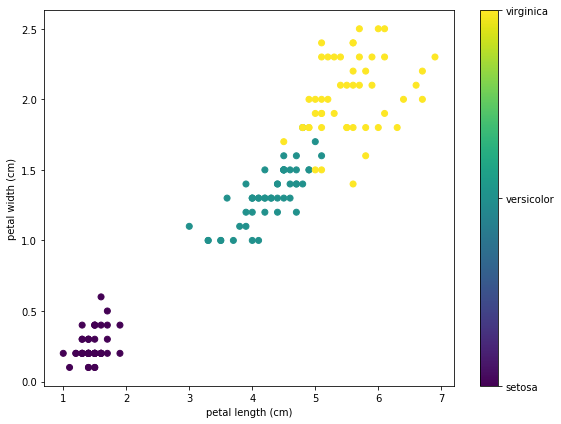

In [8]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8,6))
plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])

plt.tight_layout()
plt.show()

## Prepare the Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3, random_state=42)

## Build and Evaluate the model

In [10]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
y_pred = tree_clf.predict(X_test)

In [12]:
training_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"The training accuracy is: {training_accuracy:.3}.")
print(f"The test accuracy is: {test_accuracy:.3}.")

The training accuracy is: 1.0.
The test accuracy is: 1.0.


## Inspect the Tree

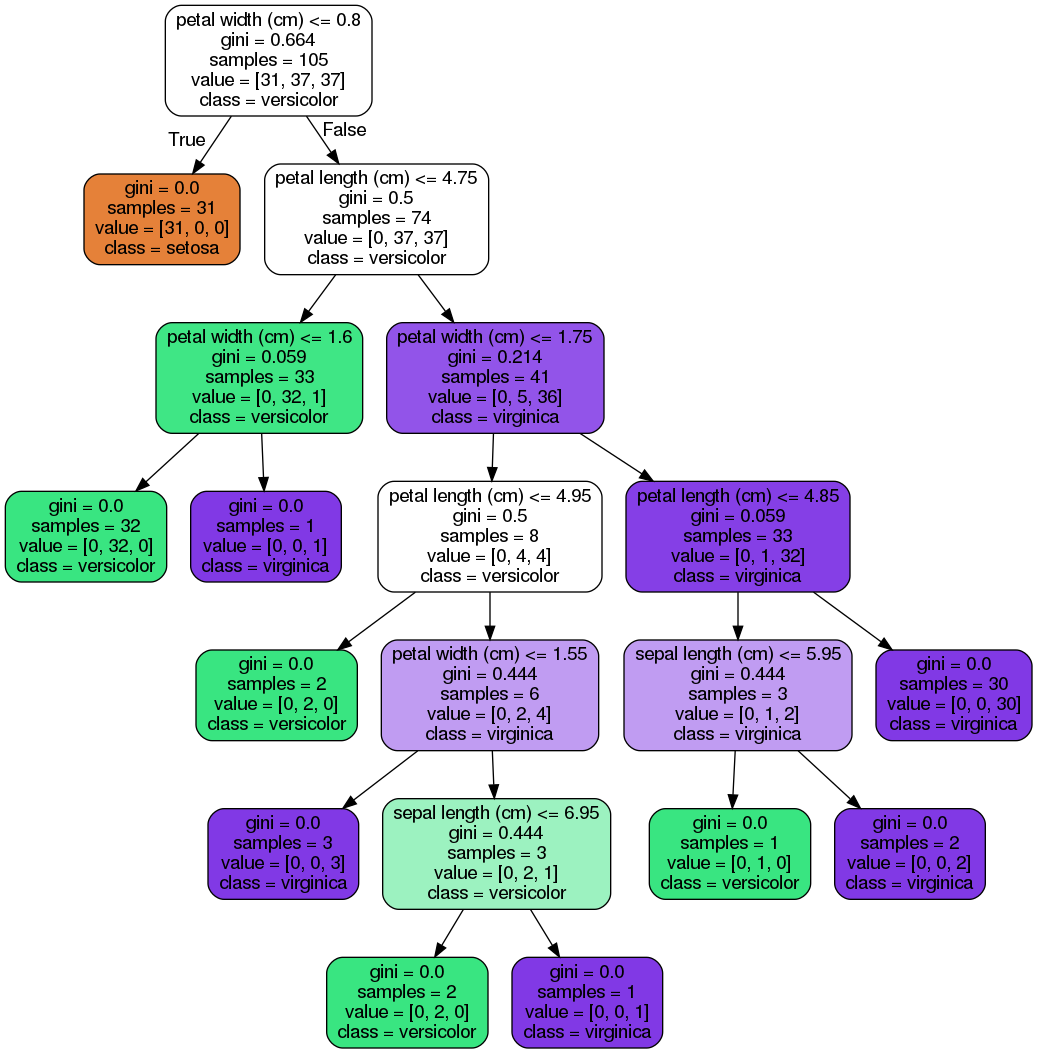

In [13]:
# Create DOT data
dot_data = export_graphviz(tree_clf,
                            out_file=None,
                            feature_names=iris.feature_names,
                            class_names=iris.target_names,
                            rounded=True,
                            filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)  


Image(graph.create_png())

In [14]:
#Save the image (optional)
graph.write_png('iris.png')

True